# 1. Importing Libraries & Dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path to import dataframe

path = r'/Users/shailioza/Documents/CareerFoundry Projects/Instacart Basket Analysis'

In [3]:
# Importing Dataframe 
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_merged.pkl'))

# 2. Checking security implications

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_final.head(10)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,price_range_loc,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,True
0,0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Busiest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,Regularly busy,Busiest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,Regularly busy,Busiest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
df_final.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'price_range_loc', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_freq',
       'order_freq_flag', 'First Name', 'Last Name', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'True'],
      dtype='object')

The dataset contains full names of the customer along with their age, income and state which is a concern as PII. However, for the purpose of this analysis, the names of the customers have been changed. Age, income and  state are not enough to identify a person. 

# 3. Regional Segmentation of Data

In [7]:
# Creating states within regions
region = []
for value in df_final['STATE']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [8]:
# Creating the region column
df_final['region'] = region

In [9]:
df_final['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
region_spend = pd.crosstab(df_final['region'],df_final['spending_flag'],dropna = False)

In [13]:
df_final['spending_flag'].value_counts()

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

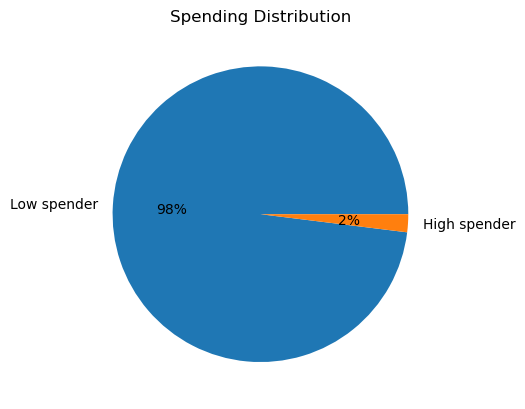

In [22]:
Spender_pie = df_final['spending_flag'].value_counts().plot.pie(title ='Spending Distribution', label = '', autopct=('%1.f%%'))

In [11]:
region_spend.to_clipboard()

In [12]:
region_spend

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


# 4. Exclusion flag for low-activity customers

In [10]:
df_final.loc[df_final['max_order'] < 5, 'low_activity_flag'] = 'Low activity customer'

In [11]:
df_final.loc[df_final['max_order'] >= 5, 'low_activity_flag'] = 'High activity customer'

In [12]:
# Checking the activity flag
df_final['low_activity_flag'].value_counts(dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: low_activity_flag, dtype: int64

In [ ]:
# Creating high order activity customer subset
df_high_activity_customers = df_final[df_final['low_activity_flag'] == 'High activity customer']

In [ ]:
# Exporting high order customers 
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_users_sample.pkl'))

In [ ]:
df_high_activity_customers.head()

# 5. Customer Profiling

Purchases from department 18 and >= 1 dependent would indicate new parent

#Here I chose department 18, because department_id 18 has products for babies; which would indicate new parents.

18 <= age < 30 is young adult

30 <= age < 50 adult

50 <= old adult

No dependents means single adult

Income less than 50k with more than 1 dependent means single parent

In [19]:
# New parent profile (including parents that have a new babies but multiple children)
df_final.loc[(df_final['n_dependants'] >= 1) &  (df_final['department_id'] == 18), 'profile'] = 'New Parent'

In [20]:
# Single adult profile
df_final.loc[(df_final['n_dependants'] == 0) &  (df_final['Age'] < 65), 'profile'] = 'Single Adult'

In [21]:
# Single parent profile
df_final.loc[(df_final['n_dependants'] >= 1) & (df_final['income'] < 50000) &  (df_final['department_id'] != 18), 'profile'] = 'Single Parent'

In [22]:
# Couple parent profile
df_final.loc[(df_final['n_dependants'] >= 1) & (df_final['income'] >= 50000) &  (df_final['department_id'] != 18), 'profile'] = 'Couple Parent'

In [23]:
# Retired adult profile
df_final.loc[(df_final['n_dependants'] == 0) &  (df_final['Age'] >= 65), 'profile'] = 'Retired Adult'

In [24]:
# Checking for profiles
df_final['profile'].value_counts(dropna = False)

Couple Parent    21323133
Single Adult      5977419
Single Parent     2666915
Retired Adult     2120084
New Parent         317308
Name: profile, dtype: int64

# 6. Profile Distribution

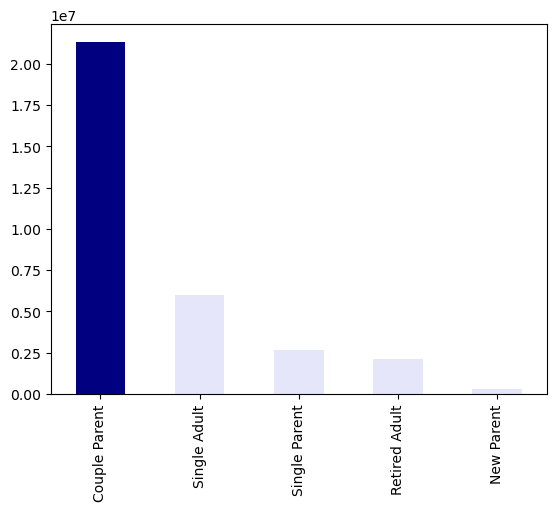

In [25]:
# Bar chart
profile_dist_bar = df_final['profile'].value_counts().plot.bar(color = ['navy', 'lavender', 'lavender', 'lavender', 'lavender'])

In [26]:
# Exporting visualiation
profile_dist_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_distibution_bar.png'))

# 7. Profile Aggregation

In [27]:
# Grouping profiles by mean, max, and min expenditure 
df_final.groupby('profile').agg({'prices' : ['mean', 'max', 'min']})

prices              
                    mean      max  min
profile                               
Couple Parent  12.649539  99999.0  1.0
New Parent      7.650679     15.0  1.0
Retired Adult  11.905177  99999.0  1.0
Single Adult   12.208715  99999.0  1.0
Single Parent   6.691449     25.0  1.0

In [28]:
# Removing the outliers
df_final.loc[df_final['prices']>100, 'prices'] = np.nan

In [29]:
df_final['prices'].max()

25.0

In [30]:
df_final.groupby('profile').agg({'prices' : ['mean', 'max', 'min']})

prices           
                   mean   max  min
profile                           
Couple Parent  7.931017  25.0  1.0
New Parent     7.650679  15.0  1.0
Retired Adult  7.801944  25.0  1.0
Single Adult   7.785729  25.0  1.0
Single Parent  6.691449  25.0  1.0

In [31]:
# Grouping profiles by mean, max, and min usage frequency (with days_since_prior_order)
df_final.groupby('profile').agg({'days_since_prior_order' : ['mean', 'max', 'min']})

days_since_prior_order           
                                mean   max  min
profile                                        
Couple Parent              11.066002  30.0  0.0
New Parent                  9.963975  30.0  0.0
Retired Adult              11.065273  30.0  0.0
Single Adult               11.086311  30.0  0.0
Single Parent              11.621855  30.0  0.0

Coupled parents spend the most according to our outcome. But single parents have more usage frequency.

# 8. Customer profiles by Region and Department

# By region

In [32]:
# Comparing profiles and regions using crosstab
regional_profiles = pd.crosstab(df_final['profile'], df_final['region'])

In [33]:
regional_profiles

region,Midwest,Northeast,South,West
profile,,,,
Couple Parent,4991867,3788490,7080228,5462548
New Parent,73594,56621,107309,79784
Retired Adult,492762,395847,691055,540420
Single Adult,1412438,1022454,2010604,1531923
Single Parent,626664,459324,902689,678238


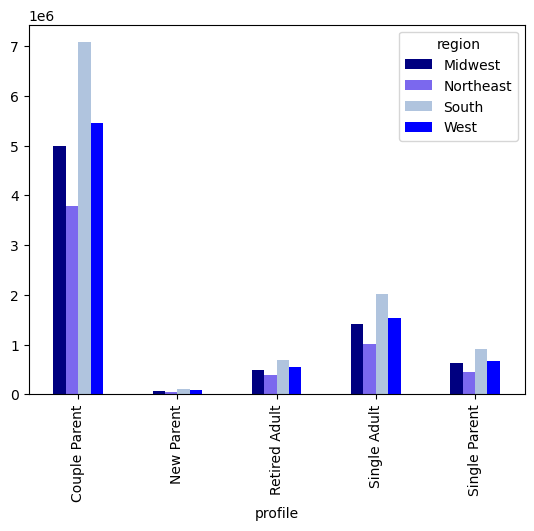

In [34]:
regional_profiles_bar = regional_profiles.plot.bar( color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue'])

Couple parents seem to spend the most, followed by single adults, then single parents, retired adults and lastly new parents. 

In [35]:
# exporting the profiles by region
regional_profiles_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_region.png'))

# By Department

In [36]:
# Creating crosstab of profiles by departments
prof_by_dep = pd.crosstab(df_final['department_id'], df_final['profile'])

In [37]:
prof_by_dep

profile,Couple Parent,New Parent,Retired Adult,Single Adult,Single Parent
department_id,,,,,
1,1502578,0,148333,408827,175005
2,24102,0,2291,6884,3014
3,791765,0,76021,218384,86258
4,6442856,0,623025,1752420,660990
5,99495,0,9764,29354,15083
6,184106,0,17494,50219,17434
7,1709435,0,176427,498015,304246
8,66211,0,7024,17559,6922
9,598751,0,56303,158959,52614


In [38]:
# Importing department dataframe

df_dep = pd.read_csv(r'/Users/shailioza/Documents/CareerFoundry Projects/Instacart Basket Analysis/02 Data/Prepared Data/departments_wrangled.csv', index_col = False)

In [39]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [40]:
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


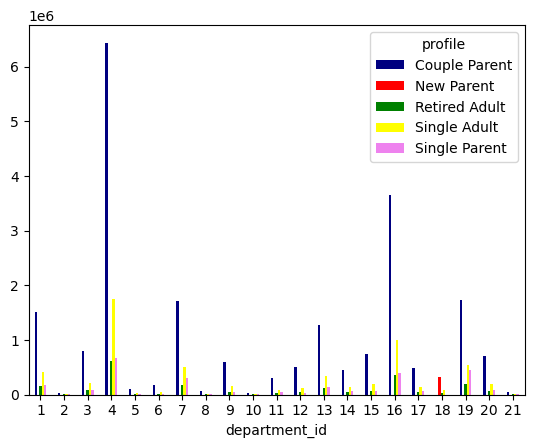

In [41]:
# Visualizing the relationship between department and profile
prof_by_dep_bar = prof_by_dep.plot.bar(rot = 0, color = ['navy', 'red', 'green', 'yellow', 'violet'])

Couple parents seem to spend most on eggs, dairy, frozen foods, snacks, beverages and produce. Since thier expenditure is significanctly higher than all other profiles, the graph seems such.

In [42]:
# Exporting the profiles by department bar graph
prof_by_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_department.png'))

In [43]:
# Numbering the regions for quicker coding

df_final.loc[df_final['STATE'].isin(['Northeast']), 'region'] = 1

In [44]:
df_final.loc[df_final['STATE'].isin(['Midwest']), 'region'] = 2

In [45]:
df_final.loc[df_final['STATE'].isin(['South']), 'region'] = 3

In [46]:
df_final.loc[df_final['STATE'].isin(['West']), 'region'] = 4

# Comparing regional profiles with department to find a trend

In [47]:
# creating region 1 df
df_reg_1 = df_final.loc[df_final['region'] == 'Northeast']

In [48]:
# checking region 1 df
df_reg_1['region'].value_counts(dropna = False)

Northeast    5722736
Name: region, dtype: int64

In [49]:
# creating region 2 df
df_reg_2 = df_final.loc[df_final['region'] == 'Midwest']

In [50]:
# checking region 2 df
df_reg_2['region'].value_counts(dropna = False)

Midwest    7597325
Name: region, dtype: int64

In [51]:
# creating region 3 df
df_reg_3 = df_final.loc[df_final['region'] == 'South']

In [52]:
df_reg_3

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,price_range_loc,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,True,region,low_activity_flag,profile
0,0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer,Single Parent
1,1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer,Single Parent
2,2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer,Single Parent
3,3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer,Single Parent
4,4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,Mid-range product,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity customer,Single Parent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404809,190604,774135,11534,12,1,13,7.0,42387,1,1,Natural 8 fl oz Alpine Spring Water,115,7,10.5,both,Regularly busy,Busiest days,Most orders,Mid-range product,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Ann,Suarez,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,both,South,High activity customer,Retired Adult
32404855,1101646,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Regularly busy,Regularly days,Most orders,Mid-range product,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both,South,Low activity customer,Single Parent
32404856,1101647,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Regularly busy,Busiest days,Most orders,Mid-range product,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both,South,Low activity customer,Single Parent
32404857,1101648,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,both,Regularly busy,Regularly days,Most orders,Mid-range product,4,New customer,8.100000,Low spender,30.0,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both,South,Low activity customer,Single Parent


In [53]:
# checking region 3 df
df_reg_3['region'].value_counts(dropna = False)

South    10791885
Name: region, dtype: int64

In [54]:
# creating region 4 df
df_reg_4 = df_final.loc[df_final['region'] == 'West']

In [55]:
# checking region 4 df
df_reg_4['region'].value_counts(dropna = False)

West    8292913
Name: region, dtype: int64

# Creating crosstabs

In [56]:
# crosstab for region 1
reg_1_cross = pd.crosstab(df_reg_1['department_id'], df_reg_1['profile'])

In [57]:
# crosstab for region 2
reg_2_cross = pd.crosstab(df_reg_2['department_id'], df_reg_2['profile'])

In [58]:
# crosstab for region 3
reg_3_cross = pd.crosstab(df_reg_3['department_id'], df_reg_3['profile'])

In [59]:
# crosstab for region 4
reg_4_cross = pd.crosstab(df_reg_4['department_id'], df_reg_4['profile'])

# 9. Creating Visualizations

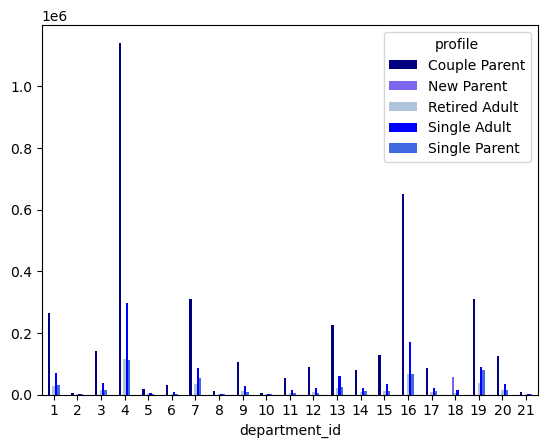

In [60]:
# bar graph of the region 1 profiles be department
reg_1_prof_dep_bar = reg_1_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

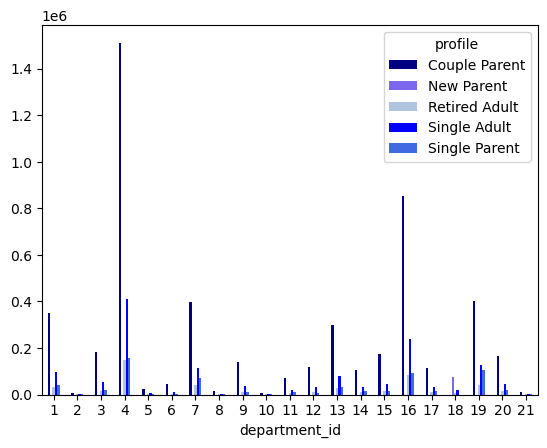

In [61]:
# bar graph of the region 2 profiles be department
reg_2_prof_dep_bar = reg_2_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

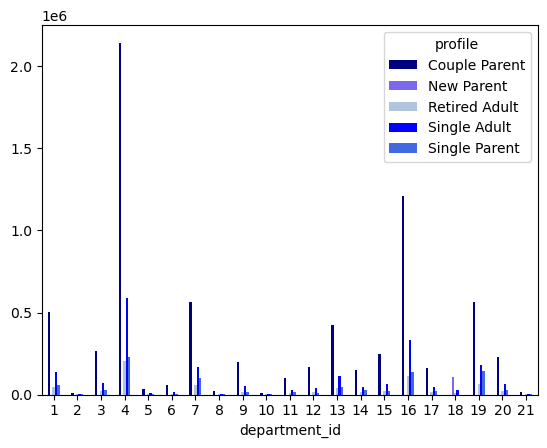

In [62]:
# bar graph of the region 3 profiles be department
reg_3_prof_dep_bar = reg_3_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

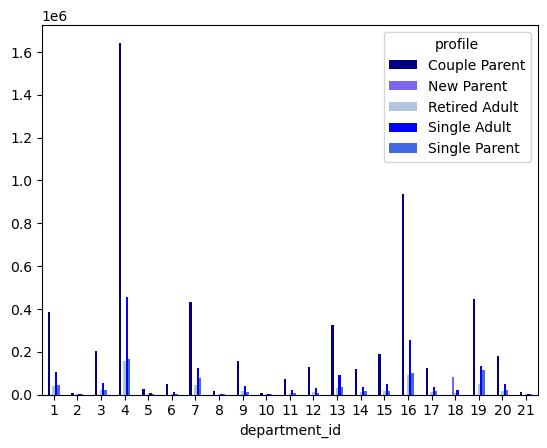

In [63]:
# bar graph of the region 4 profiles be department
reg_4_prof_dep_bar = reg_4_cross.plot.bar(rot = 0, color = ['navy', 'mediumslateblue', 'lightsteelblue', 'blue', 'royalblue'])

In [64]:
# exporting the region 1 bar chart
reg_1_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_1_profiles_by_department.png'))

In [65]:
# exporting the region 2 bar chart
reg_2_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_2_profiles_by_department.png'))

In [66]:
# exporting the region 3 bar chart
reg_3_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_3_profiles_by_department.png'))

In [67]:
# exporting the region 4 bar chart
reg_4_prof_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_4_profiles_by_department.png'))

# 10. Exporting Dataframe

In [68]:
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_final.pkl'))